<a href="https://colab.research.google.com/github/Mayaamohamed/Material-Stream-Identification-System-assigment/blob/main/Ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image, ImageOps
import hashlib

In [ ]:

from collections import Counter

def load_dataset(root_folder, img_size=(128, 128), min_size=32):
    X = []
    y = []
    seen_hashes = set()


    classes = [d for d in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, d))]
    print("Classes found:", classes)

    for class_name in classes:
        class_path = os.path.join(root_folder, class_name)
        count = 0

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)

            # remove  0kb images
            if os.path.getsize(img_path) == 0:
                continue

            # repair exif transpose
            try:
                pil_img = Image.open(img_path)
                pil_img = ImageOps.exif_transpose(pil_img)
            except:
                continue


            img = np.array(pil_img)

            # Check minimum size
            if img.shape[0] < min_size or img.shape[1] < min_size:
                continue

            # Check duplicates using hash method
            img_hash = hashlib.sha1(img.tobytes()).hexdigest()
            if img_hash in seen_hashes:
                continue
            seen_hashes.add(img_hash)

            # Resize to 128*128 pixels
            img = cv2.resize(img, img_size)

            # Convert to grayscale
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Normalize
            img = img / 255.0

            # Flatten
            img = img.flatten()

            X.append(img)
            y.append(class_name)


    print("\nFinal counts per class:")
    print(Counter(y))

    return np.array(X), np.array(y)







In [ ]:
root_folder = "/content/datasetml"
X, y = load_dataset(root_folder)
print(np.unique(y))

Classes found: ['plastic', 'cardboard', 'trash', 'metal', 'paper', 'glass']

Final counts per class:
Counter({'paper': 449, 'glass': 384, 'plastic': 363, 'metal': 315, 'cardboard': 247, 'trash': 106})
['cardboard' 'glass' 'metal' 'paper' 'plastic' 'trash']


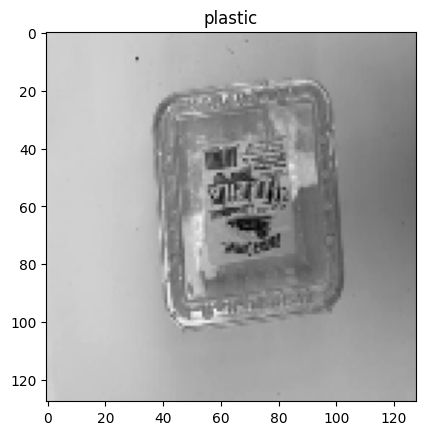

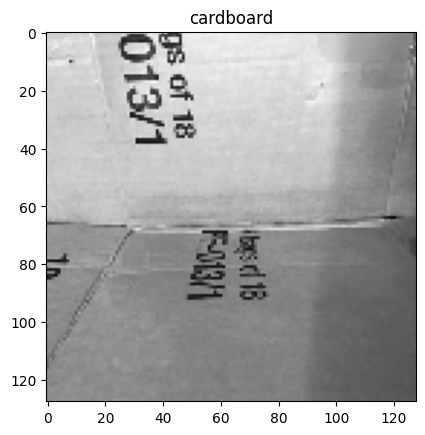

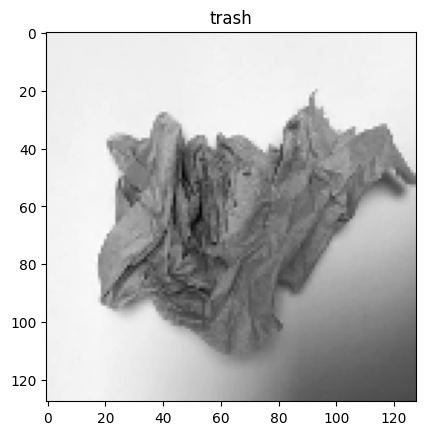

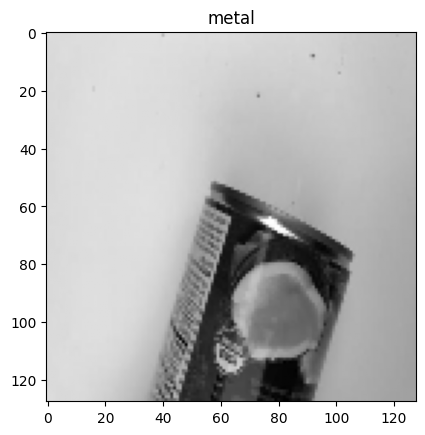

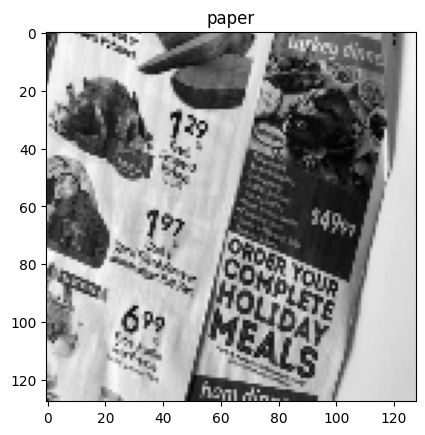

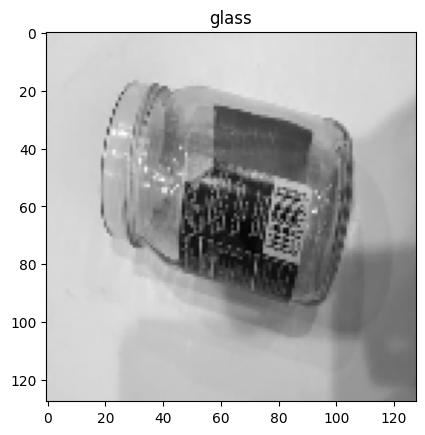

In [ ]:
import random
import matplotlib.pyplot as plt
from collections import defaultdict
class_indices = defaultdict(list)
for idx, label in enumerate(y):
    class_indices[label].append(idx)
for class_name, indices in class_indices.items():
    idx = random.choice(indices)
    plt.imshow(X[idx].reshape(128,128), cmap='gray')
    plt.title(class_name)
    plt.show()
